In [2]:
from ast import arg

import matplotlib.cbook as cbook
import random
import copy
import os

import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker

In [3]:
filename = 'sir_ini1_result_all_mu10'
with open(f'{filename}.json', 'r') as f:
    result = json.load(f)

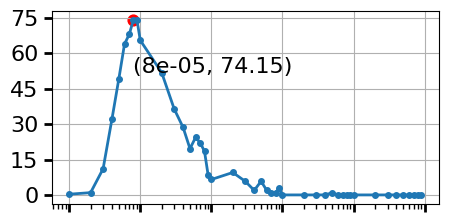

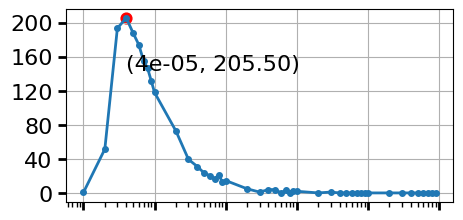

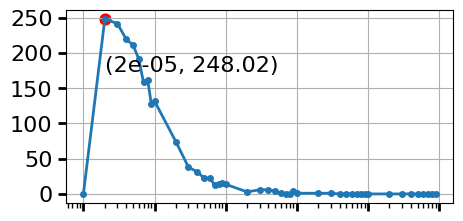

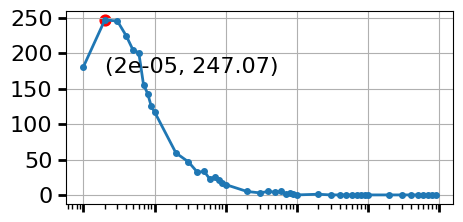

In [6]:
# mu=0.5
# lLst = [
#     1e-7, 2e-7, 3e-7, 4e-7, 5e-7, 6e-7, 7e-7, 8e-7, 9e-7,
#     1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
#     1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
#     1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
#     1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
#     1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
#     1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
#     ]
# mu=0.1
# lLst = [
#     1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8,
#     1e-7, 2e-7, 3e-7, 4e-7, 5e-7, 6e-7, 7e-7, 8e-7, 9e-7,
#     1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
#     1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
#     1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
#     1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
#     1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
#     1e-1,
#     ]
mu=1
lLst = [
    1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
    1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
    1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
    1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
    1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
    ]
fontsize1 = 16
argmaxDic = dict()
y_dic = dict()
for net in [6]:#range(1,21):
    argmaxDic[net] = dict()
    for nu in [1,2,3,4]:
        y_dic[f'net{net}_nu{nu}'] = []
        argmax = (0, 0)
        for _ in lLst:
            y_dic[f'net{net}_nu{nu}'].append(result[f'net{net}_nu{nu}_l{_}'])
            if result[f'net{net}_nu{nu}_l{_}'] > argmax[1]:
                argmax = (_, result[f'net{net}_nu{nu}_l{_}'])
        argmaxDic[net][nu] = argmax[0]
        plt.figure(figsize=(5,2.5))
        plt.plot(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', markersize=4 , markevery=1, linewidth=2)
        # plt.plot(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', markersize=5 , markevery=9, linewidth=2)
        # plt.scatter(lLst, y_dic[f'net{net}_nu{nu}'],marker='o', s=10)
        plt.scatter(argmax[0], argmax[1], color='red', s=60)
        plt.xscale('log')  # x
        font_prop = FontProperties()
        font_prop.set_size(16) 
        plt.annotate(f'({argmax[0]:.0e}, {argmax[1]:.2f})', xy=(1*argmax[0],0.7*argmax[1]), fontproperties=font_prop)
        plt.tick_params(axis='y', labelsize=fontsize1)  
        # plt.tick_params(axis='x', labelsize=fontsize1)
        plt.tick_params(axis='y', which='major', size=6, width=2)  
        plt.tick_params(axis='x', which='major', size=6, width=2) 
        plt.tick_params(axis='x', which='minor', size=3.5, width=1)  
        plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
        # plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7)) 
        plt.grid()
        plt.gca().set_xticklabels([])
        # print(net,nu)
        muName = int(mu*10)
        plt.savefig(f'savefig_si_HNC_lc/lc_mu{muName}_net{net}_nu{nu}_grid.svg', format='svg', bbox_inches='tight',dpi=300)
        plt.show()


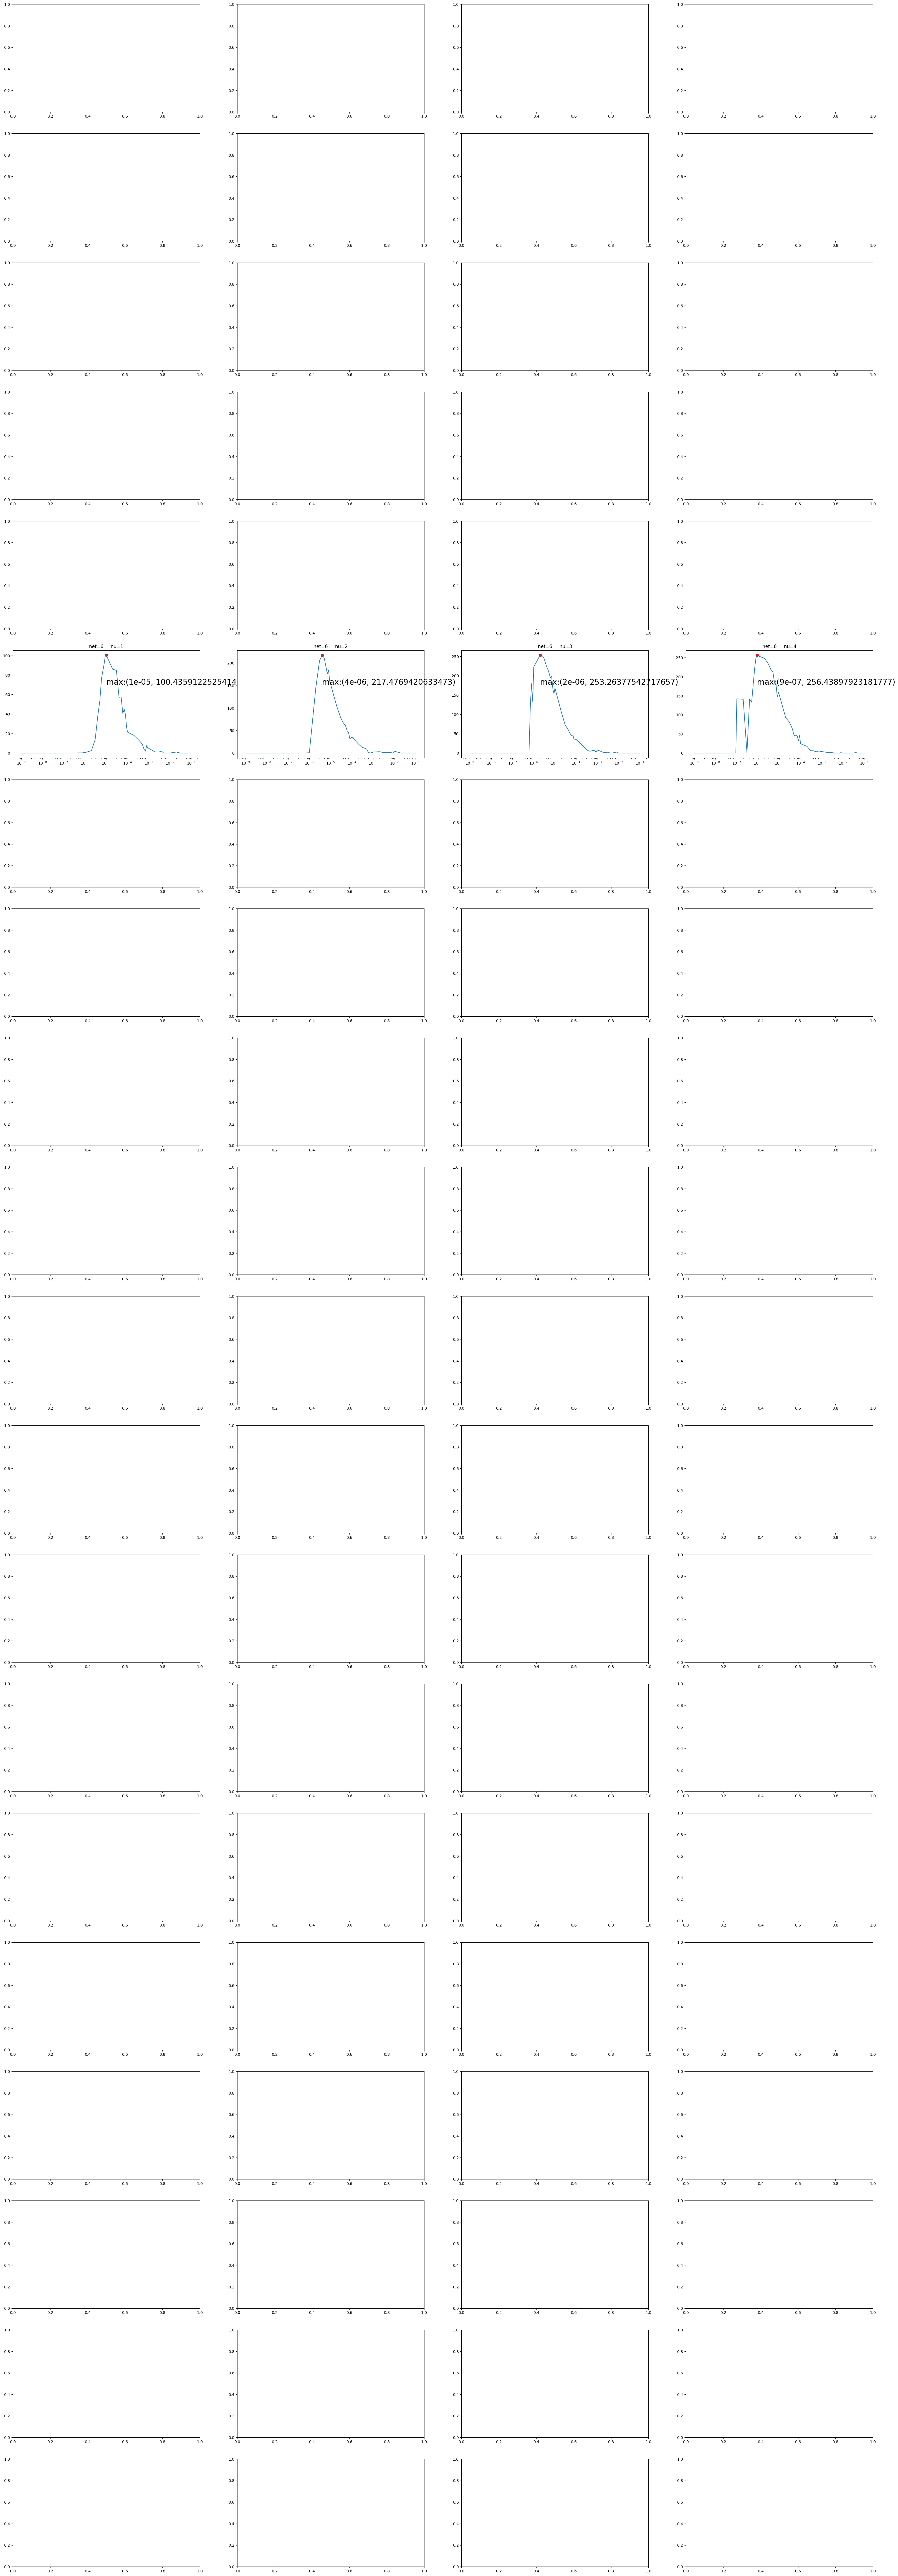

In [99]:
# lLst = [
#     1e-7, 2e-7, 3e-7, 4e-7, 5e-7, 6e-7, 7e-7, 8e-7, 9e-7,
#     1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
#     1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
#     1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
#     1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
#     1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 
#     1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
#     ]   # mu=0.5
# lLst = [
#     1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
#     1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
#     1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
#     1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
#     1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2,
#     1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1,
#     ]
lLst = [
    1e-9, 2e-9, 3e-9, 4e-9, 5e-9, 6e-9, 7e-9, 8e-9, 9e-9,
    1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8,
    1e-7, 2e-7, 3e-7, 4e-7, 5e-7, 6e-7, 7e-7, 8e-7, 9e-7,
    1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6,
    1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
    1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,
    1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 
    1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2,
    1e-1,
    ] # mu=0.1

# fig = plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(nrows=20, ncols=4, figsize=(40, 120))
# for i, ax in enumerate(axes.flat):
argmaxDic = dict()
y_dic = dict()
for net in [6]:#range(1,21):
    argmaxDic[net] = dict()
    for nu in [1,2,3, 4]:
        y_dic[f'net{net}_nu{nu}'] = []
        argmax = (0, 0)
        for _ in lLst:
            y_dic[f'net{net}_nu{nu}'].append(result[f'net{net}_nu{nu}_l{_}'])
            if result[f'net{net}_nu{nu}_l{_}'] > argmax[1]:
                argmax = (_, result[f'net{net}_nu{nu}_l{_}'])
        argmaxDic[net][nu] = argmax[0]
        ax[net-1,nu-1].plot(lLst, y_dic[f'net{net}_nu{nu}'])
        ax[net-1,nu-1].scatter(argmax[0], argmax[1], color='red', s=50)
        font_prop = FontProperties()
        font_prop.set_size(20) 
        ax[net-1,nu-1].annotate(f'max:({argmax[0]}, {argmax[1]})', xy=(argmax[0],0.7*argmax[1]), fontproperties=font_prop)
        ax[net-1,nu-1].set(title=f'net={net}     nu={nu}')
        ax[net-1,nu-1].set_xscale('log')  # x
# fig.suptitle(f'{filename}',fontsize=18, ha='left', va='bottom')
plt.show()

In [16]:
for net in argmaxDic:
    print(f'{net}:{{\'net\':{net}, \'l\':[', f'{argmaxDic[net][1]:.0e}, ', f'{argmaxDic[net][2]:.0e}, ',f'{argmaxDic[net][3]:.0e}, ',f'{argmaxDic[net][4]:.0e}]}},')

1:{'net':1, 'l':[ 2e-04,  7e-05,  3e-05,  2e-05]},
2:{'net':2, 'l':[ 2e-03,  6e-04,  3e-04,  2e-04]},
3:{'net':3, 'l':[ 4e-03,  1e-03,  8e-04,  5e-04]},
4:{'net':4, 'l':[ 1e-03,  4e-04,  2e-04,  1e-04]},
5:{'net':5, 'l':[ 4e-03,  9e-04,  6e-04,  4e-04]},
6:{'net':6, 'l':[ 5e-05,  2e-05,  1e-05,  8e-06]},
7:{'net':7, 'l':[ 2e-03,  9e-04,  5e-04,  4e-04]},
8:{'net':8, 'l':[ 7e-03,  4e-03,  3e-03,  2e-03]},
9:{'net':9, 'l':[ 4e-03,  1e-03,  7e-04,  4e-04]},
10:{'net':10, 'l':[ 7e-04,  5e-04,  4e-04,  2e-04]},
11:{'net':11, 'l':[ 6e-04,  5e-04,  4e-04,  2e-04]},
12:{'net':12, 'l':[ 9e-03,  1e-02,  1e-02,  7e-03]},
13:{'net':13, 'l':[ 8e-03,  5e-03,  4e-03,  3e-03]},
14:{'net':14, 'l':[ 1e-03,  1e-03,  9e-04,  6e-04]},
15:{'net':15, 'l':[ 9e-03,  9e-03,  8e-03,  6e-03]},
16:{'net':16, 'l':[ 8e-03,  8e-03,  6e-03,  5e-03]},
17:{'net':17, 'l':[ 6e-03,  2e-03,  8e-04,  5e-04]},
18:{'net':18, 'l':[ 3e-03,  1e-03,  7e-04,  6e-04]},
19:{'net':19, 'l':[ 2e-03,  5e-04,  3e-04,  2e-04]},
20:{'net':2